In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import re
import string

In [2]:
data_t=pd.read_csv('True.csv')
data_f=pd.read_csv('Fake.csv')
data_t.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON () - The head of a conservative Rep...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON () - Transgender people will be all...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON () - The special counsel investigat...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON () - Trump campaign adviser George ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON () - President Donald Trump...,politicsNews,"December 29, 2017"


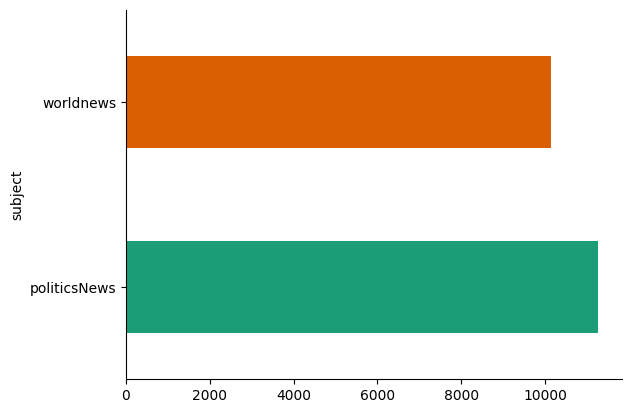

In [3]:
# @title subject
import matplotlib.pyplot as plt

data_t.groupby('subject').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [4]:
data_t['subject'].unique()

array(['politicsNews', 'worldnews'], dtype=object)

In [5]:
# df=data_t
# df['date'] = pd.to_datetime(df['date'])

# # Extract year, month, and day into separate columns
# df['year'] = df['date'].dt.year
# df['month'] = df['date'].dt.month
# df['day'] = df['date'].dt.day
# data_t

In [6]:
data_f['class']=0
data_t['class']=1
data_f.shape, data_t.shape

((23481, 5), (21417, 5))

In [7]:
data_test_t=data_t.tail(10)
for i in range(21416, 21406,-1):
  data_t.drop([i], axis=0, inplace=True)
data_test_f=data_f.tail(10)
for i in range(23480, 23470,-1):
  data_f.drop([i], axis=0, inplace=True)

data_f.shape, data_t.shape

((23471, 5), (21407, 5))

In [8]:
data_test_t.shape,data_test_f.shape

((10, 5), (10, 5))

In [9]:
data_test_t.head()

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO () - Cesar Mata Pires, the owner and...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA () - North Korea and the United States ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA () - North Korea and the United States ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN () - Danish police said on Tuesday ...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS () - Two North Korean shipments...,worldnews,"August 21, 2017",1


In [10]:
merged=pd.concat([data_t, data_f])
merged.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON () - The head of a conservative Rep...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON () - Transgender people will be all...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON () - The special counsel investigat...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON () - Trump campaign adviser George ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON () - President Donald Trump...,politicsNews,"December 29, 2017",1


In [11]:
merged.columns
data=merged.drop(['date'], axis=1)
data.tail()
data.isnull().sum()

title      0
text       0
subject    0
class      0
dtype: int64

In [12]:
data=data.sample(frac=1)

In [13]:
data.head()

,title,text,subject,class
12420,HOT OR NOT? Are Trump Properties Selling Like ...,One agent Gilad Azaria has 7 listings in T...,politics,0
22823,Trump Thanks Putin for Slashing US Embassy Sta...,21st Century Wire says Speaking to reporters f...,Middle-east,0
13260,Turkey's Erdogan says will not succumb to U.S....,ANKARA () - Turkish President Erdogan said on ...,worldnews,1
16753,WHY MOM EMPLOYED BY DISNEY Is Calling Them “Bu...,"We can t say for sure, but we re guessing the ...",Government News,0
7537,FBI tells Congress it has not changed conclusi...,WASHINGTON () - FBI Director James Comey told ...,politicsNews,1


In [14]:
data.reset_index(inplace=True)
data=data.drop(['index'], axis=1)

In [15]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [16]:
data['text']=data['text'].apply(wordopt)
data.head()

,title,text,subject,class
0,HOT OR NOT? Are Trump Properties Selling Like ...,one agent gilad azaria has listings in tr...,politics,0
1,Trump Thanks Putin for Slashing US Embassy Sta...,century wire says speaking to reporters from ...,Middle-east,0
2,Turkey's Erdogan says will not succumb to U.S....,ankara turkish president erdogan said on ...,worldnews,1
3,WHY MOM EMPLOYED BY DISNEY Is Calling Them “Bu...,we can t say for sure but we re guessing the ...,Government News,0
4,FBI tells Congress it has not changed conclusi...,washington fbi director james comey told ...,politicsNews,1


In [17]:
x = data["text"]
y = data["class"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.124582201)
# test size option: 0.124582201 or 0.25

In [18]:
import math

def optimal_test_set_size(c_test, c_train, c_0, m):
    """
    Calculates the optimal test set size based on the expected test error rate,
    the expected training error rate, and the ratio of the two.

    Parameters:
    c_test (float): The expected test error rate.
    c_train (float): The expected training error rate.
    c_0 (float): A constant term.
    m (int): The total number of available rows.

    Returns:
    int: The optimal test set size.
    """
    # Calculate the optimal test set size
    m_test = m * (c_test)**0.5 / ((c_test)**0.5 + (c_train)**0.5)
    m_train = m - m_test

    return int(m_train), int(m_test)

# Example usage
c_test = 1.6
c_train = 79
c_0 = 0
m = 44878

m_train, m_test = optimal_test_set_size(c_test, c_train, c_0, m)

print(f"Optimal training set size: {m_train}")
print(f"Optimal testing set size: {m_test}")

Optimal training set size: 39286
Optimal testing set size: 5591


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)


In [20]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [21]:
pred_lr=LR.predict(xv_test)

In [22]:
LR.score(xv_test,y_test)

0.9830114449213162

In [23]:
print(classification_report(y_test, pred_lr))


              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2975
           1       0.98      0.98      0.98      2617

    accuracy                           0.98      5592
   macro avg       0.98      0.98      0.98      5592
weighted avg       0.98      0.98      0.98      5592



**next i have to work on different tree and boost classifiers**


In [24]:
# boost classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(xv_train,y_train)

DecisionTreeClassifier()

In [26]:
pred_dt=DT.predict(xv_test)

In [27]:
DT.score(xv_test,y_test)

0.9565450643776824

In [28]:
print(classification_report(y_test, pred_dt))


              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2975
           1       0.97      0.94      0.95      2617

    accuracy                           0.96      5592
   macro avg       0.96      0.96      0.96      5592
weighted avg       0.96      0.96      0.96      5592



In [29]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(random_state=0)
gb.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [30]:
pred_gb=gb.predict(xv_test)

In [31]:
gb.score(xv_test,y_test)

0.9722818311874106

In [32]:
print(classification_report(y_test, pred_gb))


              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2975
           1       0.97      0.97      0.97      2617

    accuracy                           0.97      5592
   macro avg       0.97      0.97      0.97      5592
weighted avg       0.97      0.97      0.97      5592



In [33]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=0)
rf.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [34]:
pred_rf=rf.predict(xv_test)

In [35]:
rf.score(xv_test,y_test)

0.98068669527897

In [36]:
print(classification_report(y_test, pred_rf))


              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2975
           1       0.98      0.97      0.98      2617

    accuracy                           0.98      5592
   macro avg       0.98      0.98      0.98      5592
weighted avg       0.98      0.98      0.98      5592



In [37]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = gb.predict(new_xv_test)
    pred_RFC = rf.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),                                                                                                       output_lable(pred_DT[0]),
                                                                                                              output_lable(pred_GBC[0]),
                                                                                                              output_lable(pred_RFC[0])))

In [ ]:
news=str(input())
manual_testing(news)

In [ ]:
from joblib import dump, load

In [53]:
dump(rf, 'News-predictor.joblib')

['News-predictor.joblib']

In [54]:
print(x_train)

37150    beijing      china appeared to offer mild crit...
619      we re not sure which of judge mary murguia s q...
1768     wikileaks released another email showing how p...
15552    moscow      moscow s ambassador to the united ...
22987    what a great pick by the trump administration ...
                               ...                        
20859    last week  the washington post reported that a...
7454     during a wednesday rally at the university of ...
25699    they were probably just looking for a  safe sp...
20242    just before the gunman began shooting  the las...
19876    this letter was sent to   fed up  by an anonym...
Name: text, Length: 39286, dtype: object


In [55]:
import csv
with open('sample.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow([x_train])

In [56]:
data.to_csv('data.csv', index=False)


In [57]:
dump(LR, 'News-predictor_LR.joblib')

['News-predictor_LR.joblib']

In [58]:
dump(DT, 'News-predictor_DT.joblib')

['News-predictor_DT.joblib']

In [59]:
dump(gb, 'News-predictor_GB.joblib')

['News-predictor_GB.joblib']

In [60]:
# dump(vectorization, 'vectorization.joblib')

In [47]:
dump(vectorization, 'vectorization_temp.joblib')

['vectorization_temp.joblib']